# DataEthics - Jai

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set(rc={'figure.figsize':(6,8)}) 

import warnings
warnings.simplefilter("ignore")

%matplotlib inline

from sklearn.preprocessing import LabelEncoder 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.metrics import SCORERS
import re

import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
data = pd.read_csv('data_ethics.csv')

In [3]:
data = data.drop_duplicates('text')
data.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,x1065190678819426304,x1405214055690817536,2021-06-16 17:21:53,Bioinfo4women,Catherine d'Ignazio @kanarinka ass. prof. of @...,Twitter Web App,278,x1405211725343899649,x1065190678819426304,Bioinfo4women,...,1698,2306,2018-11-21 10:30:22,False,https://t.co/bPKhKjysVJ,http://bioinfo4women.bsc.es,NaN,https://pbs.twimg.com/profile_banners/10651906...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1065191023...
1,x20247396,x1405213743189938178,2021-06-16 17:20:38,randomvichar,First that Timnit gebru and now this @ruchowdh...,Twitter Web App,259,NaN,NaN,NaN,...,14659,11791,2009-02-06 16:07:05,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/20247396...,http://abs.twimg.com/images/themes/theme18/bg.gif,http://pbs.twimg.com/profile_images/1298349313...
2,x829405647124852736,x1405212949535285255,2021-06-16 17:17:29,EnricoManlapig,Attending a panel on human contexts and ethics...,Twitter Web App,175,NaN,NaN,NaN,...,135,207,2017-02-08 19:04:50,False,https://t.co/cEaS0tEci4,http://emanlapig.net,NaN,https://pbs.twimg.com/profile_banners/82940564...,NaN,http://pbs.twimg.com/profile_images/1395601651...
3,x42950393,x1405198601224077314,2021-06-16 16:20:28,Matrix_MSU,"""Framing the ethics of our project around incl...",Twitter Web App,265,NaN,NaN,NaN,...,1857,1047,2009-05-27 19:16:36,False,http://t.co/6I5L5wDBSQ,http://matrix.msu.edu,NaN,https://pbs.twimg.com/profile_banners/42950393...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1124338969...
4,x866729142,x1405197501750206464,2021-06-16 16:16:06,JenniferCregar,"Learn how to get unbiased, ethical insights fr...",EveryoneSocial,248,NaN,NaN,NaN,...,3662,2213,2012-10-07 18:20:01,False,https://t.co/95v7g3MojM,http://www.adp.com/solutions/midsized-business...,NaN,https://pbs.twimg.com/profile_banners/86672914...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1058204540...


In [4]:
data.shape

(818, 90)

In [5]:
df = data[["text", "is_quote", "is_retweet", "retweet_count", "hashtags", "followers_count"]]

In [6]:
text = df[["text"]][:10000] 
pd.set_option('display.max_colwidth', -1)
text.head()

,text
0,"Catherine d'Ignazio @kanarinka ass. prof. of @MITdusp, Data + Feminism Lab director @MIT. \r\n\r\n<U+0001F516> ""Data Feminism"" book about #datascience #dataethics <U+27A1><U+FE0F>https://t.co/z0Ws51WJYq\r\n\r\n#AIGenderBias\r\nStreaming in English: https://t.co/cw74rSjtZ2\r\nStreaming in Spanish: https://t.co/GbONQH7gAZ https://t.co/Mm84p1nzEM"
1,"First that Timnit gebru and now this @ruchowdh, any idea why are wokes much more in this data scientist\ai ethics roles then any other engg. dept? (maybe sampling bias but it appears that wokes have successfully appointed themselves as the gatekeepers for AI)"
2,Attending a panel on human contexts and ethics at the National Workshop on Data Science Education \r\n@BerkeleyDataSci. Does anyone know of a text that unpacks data and justice??
3,"""Framing the ethics of our project around inclusive and reparative scholarship about historical slavery and responsible stewardship of historical data about enslaved people in digital spaces."" \r\n\r\nSee our #EnslavedOrg Statement of Ethics here: https://t.co/QK9BTo1Qey"
4,"Learn how to get unbiased, ethical insights from your #AI. Wadiya (Diya) Wynn and Jack Berkowitz show how Amazon Web Services (AWS) and ADP help companies get it right. Register for the free webinar on-demand. #Data #BigData https://t.co/O4pH6DGAkW https://t.co/AxUtfJf4LL"


In [7]:
wnet = WordNetLemmatizer()
port = PorterStemmer()

In [8]:
def cleanTxt(txt):
    txt = txt.lower()
    txt = re.sub(r'RT[\s]+', '', txt) #removing RT
    txt = re.sub(r'[^\w\s]','', txt) #remove everything except words and space
    txt = re.sub(r'_','', txt) #how to remove underscore as well
    if 'https' in txt: # removing hyperlinks 
        pos = txt.find('https')
        txt = txt[:pos]
    return txt

In [9]:
text['text'] = text['text'].apply(cleanTxt)
text.head()

,text
0,catherine dignazio kanarinka ass prof of mitdusp data feminism lab director mit \r\n\r\nu0001f516 data feminism book about datascience dataethics u27a1ufe0f
1,first that timnit gebru and now this ruchowdh any idea why are wokes much more in this data scientistai ethics roles then any other engg dept maybe sampling bias but it appears that wokes have successfully appointed themselves as the gatekeepers for ai
2,attending a panel on human contexts and ethics at the national workshop on data science education \r\nberkeleydatasci does anyone know of a text that unpacks data and justice
3,framing the ethics of our project around inclusive and reparative scholarship about historical slavery and responsible stewardship of historical data about enslaved people in digital spaces \r\n\r\nsee our enslavedorg statement of ethics here
4,learn how to get unbiased ethical insights from your ai wadiya diya wynn and jack berkowitz show how amazon web services aws and adp help companies get it right register for the free webinar ondemand data bigdata


In [10]:
def stopWords(txt): 
    txt_lst = txt.split(" ")
    txt_lst = [word for word in txt_lst if word not in stopwords.words('english')]
    txt_lst = [wnet.lemmatize(word) for word in txt_lst]
    txt_lst = [word for word in txt_lst if word != '']
    txt_lst = [word for word in txt_lst if word != '\r\n\r\n'] # indicates space and indexing
    txt_lst = [word for word in txt_lst if word != 'u0001f449'] # indicates back hand emoji pointing right
    txt_lst = [word for word in txt_lst if word != 'data']
    txt_lst = [word for word in txt_lst if word != 'ethics']
    txt_lst = [word for word in txt_lst if word != 'ethic']  
    txt_lst = [word for word in txt_lst if word != 'ethical']
    txt_lst = [word for word in txt_lst if word != 'dataethics']
    txt_lst = [word for word in txt_lst if word != 'techethics']
    txt_lst = [word for word in txt_lst if word != '\r\n']
    txt_lst = [word for word in txt_lst if word != 'digitalethics']
    txt_lst = [word for word in txt_lst if word != 'u']
    return " ".join(txt_lst)

In [11]:
text['text'] = text['text'].apply(stopWords)
text.head()

,text
0,catherine dignazio kanarinka as prof mitdusp feminism lab director mit \r\n\r\nu0001f516 feminism book datascience u27a1ufe0f
1,first timnit gebru ruchowdh idea wokes much scientistai role engg dept maybe sampling bias appears wokes successfully appointed gatekeeper ai
2,attending panel human context national workshop science education \r\nberkeleydatasci anyone know text unpacks justice
3,framing project around inclusive reparative scholarship historical slavery responsible stewardship historical enslaved people digital space \r\n\r\nsee enslavedorg statement
4,learn get unbiased insight ai wadiya diya wynn jack berkowitz show amazon web service aws adp help company get right register free webinar ondemand bigdata


In [12]:
text_lst = []
for row in text['text']:
    text_lst.append(row)

text_lst[:5]

['catherine dignazio kanarinka as prof mitdusp feminism lab director mit \r\n\r\nu0001f516 feminism book datascience u27a1ufe0f',
 'first timnit gebru ruchowdh idea wokes much scientistai role engg dept maybe sampling bias appears wokes successfully appointed gatekeeper ai',
 'attending panel human context national workshop science education \r\nberkeleydatasci anyone know text unpacks justice',
 'framing project around inclusive reparative scholarship historical slavery responsible stewardship historical enslaved people digital space \r\n\r\nsee enslavedorg statement',
 'learn get unbiased insight ai wadiya diya wynn jack berkowitz show amazon web service aws adp help company get right register free webinar ondemand bigdata']

In [13]:
tv = TfidfVectorizer(
binary = True, norm = None,
use_idf = False, smooth_idf = False,
lowercase = True, stop_words = None,
min_df = 1, max_df = 1.0, max_features = None, ngram_range = (1,1))

In [14]:
text_vec = pd.DataFrame(tv.fit_transform(text_lst).toarray(), columns = tv.get_feature_names())
text_vec.head()

,0609,0800,0ufe0fu20e3pujiya,10,100,10000,100daysofcode,101,1016s,102johnl,...,yt,yun,zaidzamanhamid,zero,zerodhas,zezima,zfusfeld,zoetermeer,zoom,zubhaque
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
text_vec.shape

(818, 5068)

In [16]:
cs_words = []

for row in text['text']:
    for word in str(row).split(" "):
        cs_words.append(word)
        
cs_words[:5]

['catherine', 'dignazio', 'kanarinka', 'as', 'prof']

In [17]:
len(cs_words)

14265

In [18]:
from nltk.probability import FreqDist
fdist = FreqDist()
for word in cs_words:
    fdist[word]+=1
fdist

FreqDist({'ai': 198, 'amp': 172, 'research': 89, 'digital': 81, 'privacy': 78, 'governance': 77, 'tech': 70, 'technology': 69, 'policy': 67, 'artificialintelligence': 65, ...})

In [19]:
freq_data = pd.DataFrame.from_dict(fdist.most_common(20))

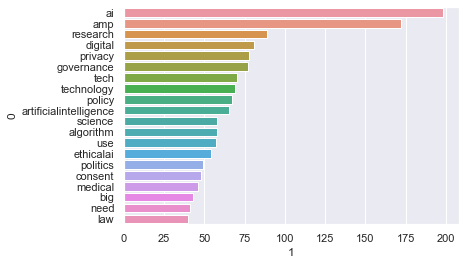

In [20]:
sns.barplot(data = freq_data, x = 1, y = 0);

In [21]:
most_common = []

for key in fdist.most_common(20):
    most_common.append(key[0])
    
most_common

['ai',
 'amp',
 'research',
 'digital',
 'privacy',
 'governance',
 'tech',
 'technology',
 'policy',
 'artificialintelligence',
 'science',
 'algorithm',
 'use',
 'ethicalai',
 'politics',
 'consent',
 'medical',
 'big',
 'need',
 'law']

# KMeans Clustering 

In [22]:
def evaluate_k_kmeans_inertia(k):
    print(f"running Kmeans with k={k}")
    estimator_kmeans = KMeans(random_state=42, n_clusters=k)
    estimator_kmeans.fit(text_vec)
    return estimator_kmeans.inertia_

In [23]:
%%time 
range_k = [i for i in range(1, 9)]
results_k = {}
for k in range_k:
    results_k[k] = evaluate_k_kmeans_inertia(k)

running Kmeans with k=1
running Kmeans with k=2
running Kmeans with k=3
running Kmeans with k=4
running Kmeans with k=5
running Kmeans with k=6
running Kmeans with k=7
running Kmeans with k=8
Wall time: 11.3 s


In [24]:
results_k

{1: 13840.727383863044,
 2: 13360.229505586345,
 3: 13334.32165503272,
 4: 13154.474196951538,
 5: 13061.880406449138,
 6: 12988.950030921562,
 7: 12794.287919013788,
 8: 12784.892767612842}

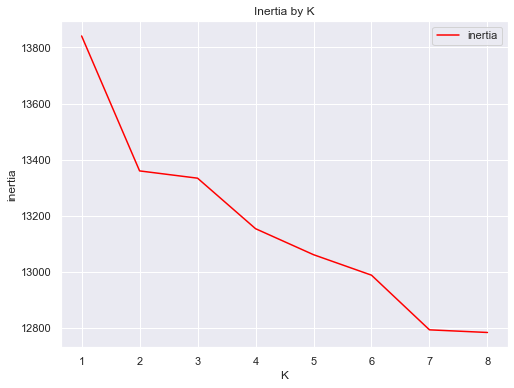

In [25]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(
    [c[0] for c in results_k.items()],
    [c[1] for c in results_k.items()], label="inertia", color="red")
ax.set_xlabel("K")
ax.set_ylabel("inertia")
ax.set_title("Inertia by K")
ax.legend();

In [26]:
estimator_kmeans = KMeans(random_state=42, n_clusters=5) 
estimator_kmeans.fit(text_vec)

KMeans(n_clusters=5, random_state=42)

In [27]:
text_vec["cluster_id"] = estimator_kmeans.labels_
text_vec.head()

,0609,0800,0ufe0fu20e3pujiya,10,100,10000,100daysofcode,101,1016s,102johnl,...,yun,zaidzamanhamid,zero,zerodhas,zezima,zfusfeld,zoetermeer,zoom,zubhaque,cluster_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [28]:
text_clusters = text_vec.groupby('cluster_id').sum()
text_clusters.head()

,0609,0800,0ufe0fu20e3pujiya,10,100,10000,100daysofcode,101,1016s,102johnl,...,yt,yun,zaidzamanhamid,zero,zerodhas,zezima,zfusfeld,zoetermeer,zoom,zubhaque
cluster_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,11.0,2.0,1.0,3.0,0.0,1.0,2.0,...,1.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
text_clusters_20 = text_clusters[['ai',
 'amp',
 'research',
 'digital',
 'privacy',
 'governance',
 'tech',
 'technology',
 'policy',
 'artificialintelligence',
 'science',
 'algorithm',
 'use',
 'ethicalai',
 'politics',
 'consent',
 'medical',
 'big',
 'need',
 'law']
]

text_clusters_20.head()

,ai,amp,research,digital,privacy,governance,tech,technology,policy,artificialintelligence,science,algorithm,use,ethicalai,politics,consent,medical,big,need,law
cluster_id,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,48.0,3.0,0.0,49.0,1.0,49.0,49.0,48.0,49.0,48.0,0.0,49.0,3.0,49.0,43.0,0.0,0.0,0.0,1.0,2.0
2,114.0,120.0,76.0,28.0,62.0,16.0,22.0,21.0,19.0,25.0,53.0,8.0,53.0,4.0,5.0,45.0,41.0,41.0,33.0,36.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


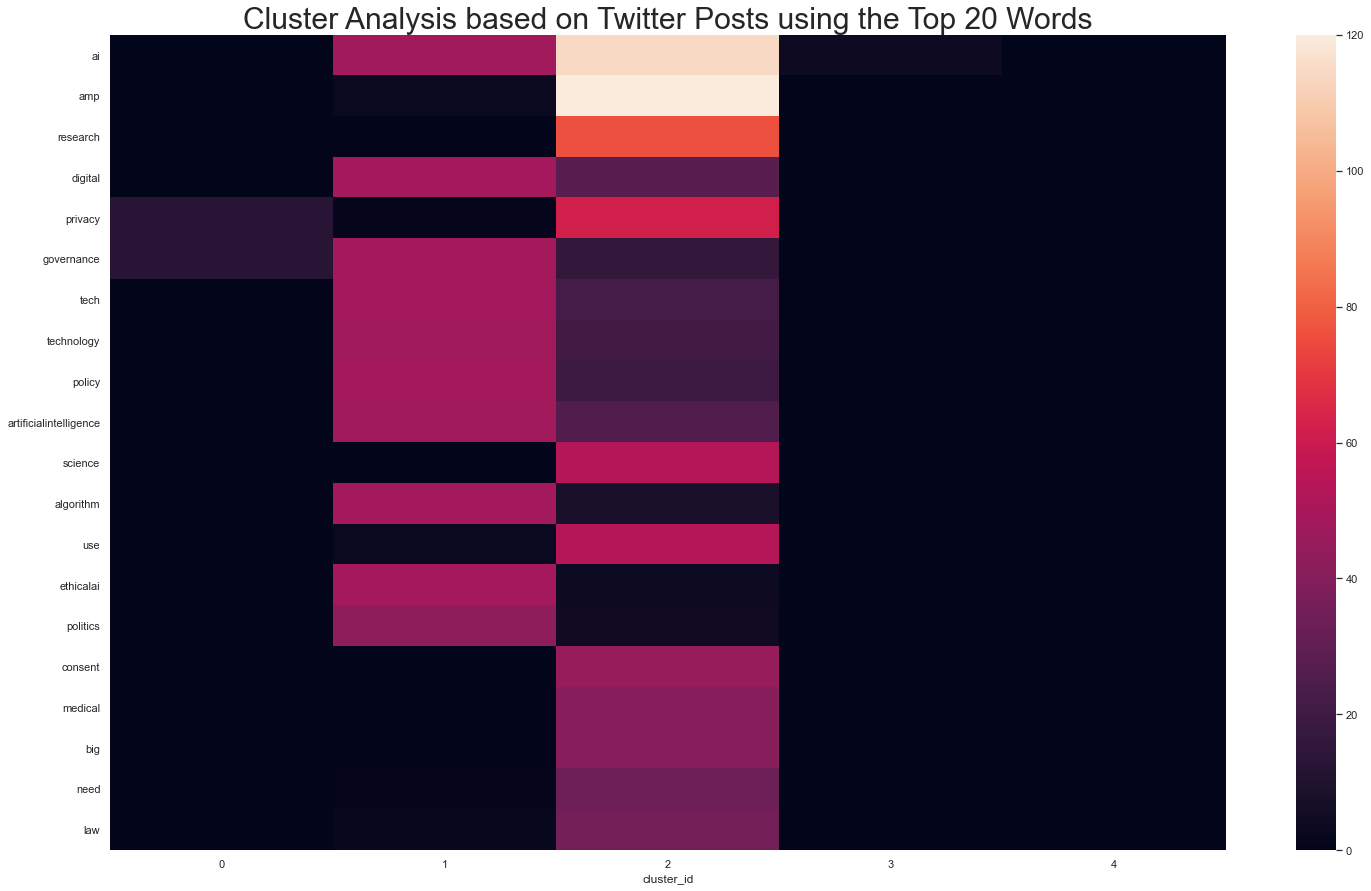

In [30]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(text_clusters_20.transpose(), annot=False)
plt.title("Cluster Analysis based on Twitter Posts using the Top 20 Words", size = 30);

In [31]:
!pip install vaderSentiment

In [32]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()
text['scores'] = text['text'].apply(lambda review: sid_obj.polarity_scores(review))

In [33]:
text.head()

,text,scores
0,catherine dignazio kanarinka as prof mitdusp feminism lab director mit \r\n\r\nu0001f516 feminism book datascience u27a1ufe0f,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
1,first timnit gebru ruchowdh idea wokes much scientistai role engg dept maybe sampling bias appears wokes successfully appointed gatekeeper ai,"{'neg': 0.062, 'neu': 0.796, 'pos': 0.142, 'compound': 0.4215}"
2,attending panel human context national workshop science education \r\nberkeleydatasci anyone know text unpacks justice,"{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.5267}"
3,framing project around inclusive reparative scholarship historical slavery responsible stewardship historical enslaved people digital space \r\n\r\nsee enslavedorg statement,"{'neg': 0.302, 'neu': 0.605, 'pos': 0.093, 'compound': -0.7351}"
4,learn get unbiased insight ai wadiya diya wynn jack berkowitz show amazon web service aws adp help company get right register free webinar ondemand bigdata,"{'neg': 0.037, 'neu': 0.705, 'pos': 0.258, 'compound': 0.765}"


In [34]:
text['compound']  = text['scores'].apply(lambda score_dict: score_dict['compound'])
text.head()

,text,scores,compound
0,catherine dignazio kanarinka as prof mitdusp feminism lab director mit \r\n\r\nu0001f516 feminism book datascience u27a1ufe0f,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
1,first timnit gebru ruchowdh idea wokes much scientistai role engg dept maybe sampling bias appears wokes successfully appointed gatekeeper ai,"{'neg': 0.062, 'neu': 0.796, 'pos': 0.142, 'compound': 0.4215}",0.4215
2,attending panel human context national workshop science education \r\nberkeleydatasci anyone know text unpacks justice,"{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.5267}",0.5267
3,framing project around inclusive reparative scholarship historical slavery responsible stewardship historical enslaved people digital space \r\n\r\nsee enslavedorg statement,"{'neg': 0.302, 'neu': 0.605, 'pos': 0.093, 'compound': -0.7351}",-0.7351
4,learn get unbiased insight ai wadiya diya wynn jack berkowitz show amazon web service aws adp help company get right register free webinar ondemand bigdata,"{'neg': 0.037, 'neu': 0.705, 'pos': 0.258, 'compound': 0.765}",0.7650


In [35]:
text['comp_score'] = text['compound'].apply(lambda c: 'pos' if c >=0.05 else ('neg' if c <= -0.05 else 'neutral'))

text.head()

,text,scores,compound,comp_score
0,catherine dignazio kanarinka as prof mitdusp feminism lab director mit \r\n\r\nu0001f516 feminism book datascience u27a1ufe0f,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
1,first timnit gebru ruchowdh idea wokes much scientistai role engg dept maybe sampling bias appears wokes successfully appointed gatekeeper ai,"{'neg': 0.062, 'neu': 0.796, 'pos': 0.142, 'compound': 0.4215}",0.4215,pos
2,attending panel human context national workshop science education \r\nberkeleydatasci anyone know text unpacks justice,"{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.5267}",0.5267,pos
3,framing project around inclusive reparative scholarship historical slavery responsible stewardship historical enslaved people digital space \r\n\r\nsee enslavedorg statement,"{'neg': 0.302, 'neu': 0.605, 'pos': 0.093, 'compound': -0.7351}",-0.7351,neg
4,learn get unbiased insight ai wadiya diya wynn jack berkowitz show amazon web service aws adp help company get right register free webinar ondemand bigdata,"{'neg': 0.037, 'neu': 0.705, 'pos': 0.258, 'compound': 0.765}",0.7650,pos


In [36]:
comp_score_counts = text.comp_score.value_counts()

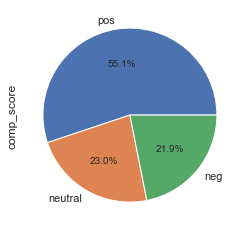

In [37]:
comp_score_counts.plot.pie(autopct="%.1f%%");

In [38]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

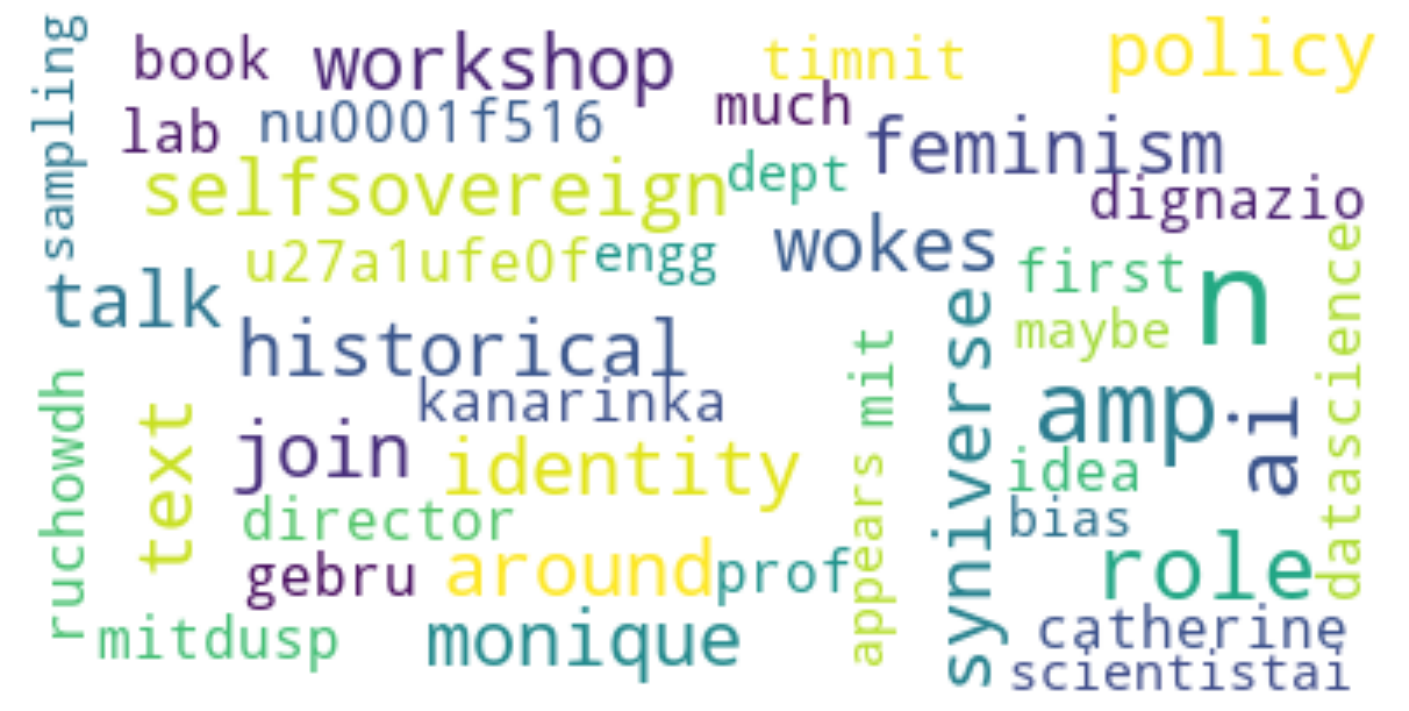

In [39]:
stopwords = set(STOPWORDS)
new_stopwords=stopwords.union(text['text'])
wc = WordCloud(
         background_color="white", max_words=2000,
         min_font_size =15, max_font_size=40, relative_scaling =
         0.5, stopwords=new_stopwords,normalize_plurals= True)
import re
textonly = re.sub("", "",str(text['text']))
wc.generate(textonly)
plt.figure(figsize=(25,25))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
